# Project a

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('D1.csv')
df=df.dropna(axis=0,how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15678 entries, 0 to 19662
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    15678 non-null  int64  
 1   StockCode    15678 non-null  object 
 2   Description  15678 non-null  object 
 3   Quantity     15678 non-null  int64  
 4   InvoiceDate  15678 non-null  object 
 5   UnitPrice    15678 non-null  float64
 6   CustomerID   15678 non-null  float64
 7   Country      15678 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 1.1+ MB


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df['CustomerID'].unique()

array([17850., 13047., 14688., ..., 13436., 15399., 17144.])

Task 1. What pre-processing was required on the dataset before building the association mining model? What variables did you include in the analysis? Justify your choice.
step1: transform to the proper data type
step2: check if there are incorrect value contained####modify is needed

In [4]:
#InvoiceNo : Unique "ID" of invoice (ID is categorical variable, should be string instead)
df['InvoiceNo']=df['InvoiceNo'].astype(str) 
#StockCode : "ID" of item purchased (correct: obj(String))
#Description : "String" Description of item purchased(correct: obj(String))
#Quantity : "Numeric" quantity of item purchased(correct: int)
#InvoiceDate : "Datetime" type of date and time of purchase (Datetime type should be used)
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
#UnitPrice : "Numeric" price of the item (correct: float)
#CustomerID : Unique "ID" of the customer (ID should be string)
na=df['CustomerID'].dropna().astype(int) 
df['CustomerID']=na.astype(str)
#Country : "String" of Country of the customer (correct: obj(String))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15678 entries, 0 to 19662
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    15678 non-null  object        
 1   StockCode    15678 non-null  object        
 2   Description  15678 non-null  object        
 3   Quantity     15678 non-null  int64         
 4   InvoiceDate  15678 non-null  datetime64[ns]
 5   UnitPrice    15678 non-null  float64       
 6   CustomerID   15678 non-null  object        
 7   Country      15678 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 1.1+ MB


In [5]:
df.shape

(15678, 8)

In [6]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-01-12 08:34:00,1.69,13047,United Kingdom
2,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 09:02:00,2.55,17850,United Kingdom
3,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 09:32:00,2.55,17850,United Kingdom
4,536378,22386,JUMBO BAG PINK POLKADOT,10,2010-01-12 09:37:00,1.95,14688,United Kingdom
5,536378,20725,LUNCH BAG RED RETROSPOT,10,2010-01-12 09:37:00,1.65,14688,United Kingdom
6,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-01-12 09:37:00,0.42,14688,United Kingdom
7,536384,22457,NATURAL SLATE HEART CHALKBOARD,12,2010-01-12 09:53:00,2.95,18074,United Kingdom
8,536384,22469,HEART OF WICKER SMALL,40,2010-01-12 09:53:00,1.45,18074,United Kingdom
9,536386,85099B,JUMBO BAG RED RETROSPOT,100,2010-01-12 09:57:00,1.65,16029,United Kingdom


In [7]:
df.drop(['CustomerID','Quantity','StockCode','InvoiceDate','UnitPrice','Country'],axis=1)

,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536367,ASSORTED COLOUR BIRD ORNAMENT
2,536373,WHITE HANGING HEART T-LIGHT HOLDER
3,536375,WHITE HANGING HEART T-LIGHT HOLDER
4,536378,JUMBO BAG PINK POLKADOT
...,...,...
19658,581538,LUNCH BAG BLACK SKULL.
19659,581538,LUNCH BAG RED RETROSPOT
19660,581579,JUMBO BAG PINK POLKADOT
19661,581583,LUNCH BAG RED RETROSPOT


In [8]:
df['CustomerID'].head(5)

0    17850
1    13047
2    17850
3    17850
4    14688
Name: CustomerID, dtype: object

In [9]:
customer_dropna=df['CustomerID'].dropna()
customer_dropna.head(10)

0    17850
1    13047
2    17850
3    17850
4    14688
5    14688
6    14688
7    18074
8    18074
9    16029
Name: CustomerID, dtype: object

In [10]:
df['StockCode'].sort_values().unique()

array(['20725', '20727', '21212', '22386', '22423', '22457', '22469',
       '22720', '47566', '84879', '85099B', '85123A'], dtype=object)

In [11]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
PACK OF 72 RETROSPOT CAKE CASES       1068
HEART OF WICKER SMALL                  985
NATURAL SLATE HEART CHALKBOARD         980
JUMBO BAG PINK POLKADOT                890
Name: Description, dtype: int64

In [12]:
df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER',
       'ASSORTED COLOUR BIRD ORNAMENT', 'JUMBO BAG PINK POLKADOT',
       'LUNCH BAG RED RETROSPOT', 'PACK OF 72 RETROSPOT CAKE CASES',
       'NATURAL SLATE HEART CHALKBOARD ', 'HEART OF WICKER SMALL',
       'JUMBO BAG RED RETROSPOT', 'LUNCH BAG  BLACK SKULL.',
       'REGENCY CAKESTAND 3 TIER', 'PARTY BUNTING',
       'SET OF 3 CAKE TINS PANTRY DESIGN '], dtype=object)

In [13]:
#df['Description']=df['Description'].replace({'WHITE HANGING HEART T-LIGHT HOLDER':'WHHTH','JUMBO BAG RED RETROSPOT':'JBRR','REGENCY CAKESTAND 3 TIER':'RC3T','PARTY BUNTING':'PB','LUNCH BAG RED RETROSPOT':'LBRR','ASSORTED COLOUR BIRD ORNAMENT':'ACBO','SET OF 3 CAKE TINS PANTRY DESIGN':'SO3CTPD','PACK OF 72 RETROSPOT CAKE CASES':'PO7RCC','LUNCH BAG  BLACK SKULL':'LBBS','NATURAL SLATE HEART CHALKBOARD':'NSHC','JUMBO BAG PINK POLKADOT':'JBPP','HEART OF WICKER SMALL':'HOWS'}).dropna()
#df['Description'].value_counts()

In [14]:
#pd.set_option('display.max_rows',None)
df['StockCode'].value_counts()

85123A    2028
22423     1724
85099B    1618
84879     1408
47566     1397
20725     1316
22720     1159
20727     1105
21212     1068
22469      985
22457      980
22386      890
Name: StockCode, dtype: int64

In [15]:
#cus_dropna=df['CustomerID'].dropna() #whether drop null or not, the result doesnt seem changed
#cus_dropna.head(100)
#cus_fillna=df['CustomerID'].fillna('0')
#cus_fillna.head(100)
#cus_fillna.describe()

In [16]:
# group by InvoiceNo, and list all items(Description) that are purchased based on invoice No
itemlist_all_individual_invoiceNo = df.groupby(['InvoiceNo'])['Description'].apply(list)
print(itemlist_all_individual_invoiceNo.head(5))

InvoiceNo
536365                 [WHITE HANGING HEART T-LIGHT HOLDER]
536367                      [ASSORTED COLOUR BIRD ORNAMENT]
536373                 [WHITE HANGING HEART T-LIGHT HOLDER]
536375                 [WHITE HANGING HEART T-LIGHT HOLDER]
536378    [JUMBO BAG PINK POLKADOT, LUNCH BAG RED RETROS...
Name: Description, dtype: object


In [17]:
from apyori import apriori

# type cast the transactions from pandas into normal list format and run apriori
purchase_list = list(itemlist_all_individual_invoiceNo)
outcome = list(apriori(purchase_list, min_support=0.01))

print(outcome[:3])

[RelationRecord(items=frozenset({'ASSORTED COLOUR BIRD ORNAMENT'}), support=0.15757506303002522, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ASSORTED COLOUR BIRD ORNAMENT'}), confidence=0.15757506303002522, lift=1.0)]), RelationRecord(items=frozenset({'HEART OF WICKER SMALL'}), support=0.11013064405225761, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'HEART OF WICKER SMALL'}), confidence=0.11013064405225761, lift=1.0)]), RelationRecord(items=frozenset({'JUMBO BAG PINK POLKADOT'}), support=0.09981663992665597, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'JUMBO BAG PINK POLKADOT'}), confidence=0.09981663992665597, lift=1.0)])]


In [18]:
#pd.set_option('display.max_rows',None)
def convert_outcome_to_pandas_df(outcome):
    rules = []
    
    for r_set in outcome:
        for r in r_set.ordered_statistics:
            rules.append([','.join(r.items_base), ','.join(r.items_add),
                         r_set.support, r.confidence, r.lift]) 
    return pd.DataFrame(rules, columns=['Left_side','Right_side', 'Support', 
                                        'Confidence', 'Lift']) 

outcome_df = convert_outcome_to_pandas_df(outcome)
outcome_df.head(20)

,Left_side,Right_side,Support,Confidence,Lift
0,,ASSORTED COLOUR BIRD ORNAMENT,0.157575,0.157575,1.000000
1,,HEART OF WICKER SMALL,0.110131,0.110131,1.000000
2,,JUMBO BAG PINK POLKADOT,0.099817,0.099817,1.000000
3,,JUMBO BAG RED RETROSPOT,0.183360,0.183360,1.000000
4,,LUNCH BAG BLACK SKULL.,0.120559,0.120559,1.000000
5,,LUNCH BAG RED RETROSPOT,0.147605,0.147605,1.000000
6,,NATURAL SLATE HEART CHALKBOARD,0.110818,0.110818,1.000000
7,,PACK OF 72 RETROSPOT CAKE CASES,0.117923,0.117923,1.000000
8,,PARTY BUNTING,0.158148,0.158148,1.000000
9,,REGENCY CAKESTAND 3 TIER,0.195278,0.195278,1.000000


In [19]:
# sort rules with descending order by lift value
outcome_df= outcome_df.sort_values(by='Lift', ascending=False)
outcome_df.head(5)

,Left_side,Right_side,Support,Confidence,Lift
231,"LUNCH BAG RED RETROSPOT,JUMBO BAG PINK POLKADOT","LUNCH BAG BLACK SKULL.,JUMBO BAG RED RETROSPOT",0.011804,0.432773,13.883743
232,"LUNCH BAG BLACK SKULL.,JUMBO BAG RED RETROSPOT","LUNCH BAG RED RETROSPOT,JUMBO BAG PINK POLKADOT",0.011804,0.378676,13.883743
233,"JUMBO BAG RED RETROSPOT,LUNCH BAG RED RETROSPOT","LUNCH BAG BLACK SKULL.,JUMBO BAG PINK POLKADOT",0.011804,0.242353,10.734882
230,"LUNCH BAG BLACK SKULL.,JUMBO BAG PINK POLKADOT","JUMBO BAG RED RETROSPOT,LUNCH BAG RED RETROSPOT",0.011804,0.522843,10.734882
238,"LUNCH BAG BLACK SKULL.,JUMBO BAG RED RETROSPO...",JUMBO BAG PINK POLKADOT,0.011804,0.581921,5.829899


In [20]:
outcome_df=outcome_df[outcome_df['Left_side']=='LUNCH BAG RED RETROSPOT'][:20]
outcome_df

,Left_side,Right_side,Support,Confidence,Lift
228,LUNCH BAG RED RETROSPOT,"LUNCH BAG BLACK SKULL.,JUMBO BAG RED RETROSPO...",0.011804,0.079969,5.168956
213,LUNCH BAG RED RETROSPOT,"LUNCH BAG BLACK SKULL.,JUMBO BAG RED RETROSPOT",0.020284,0.137422,4.408631
206,LUNCH BAG RED RETROSPOT,"LUNCH BAG BLACK SKULL.,JUMBO BAG PINK POLKADOT",0.014554,0.098602,4.367539
219,LUNCH BAG RED RETROSPOT,"LUNCH BAG BLACK SKULL.,WHITE HANGING HEART T-...",0.010887,0.073758,3.478974
110,LUNCH BAG RED RETROSPOT,LUNCH BAG BLACK SKULL.,0.059248,0.401398,3.329463
199,LUNCH BAG RED RETROSPOT,"JUMBO BAG RED RETROSPOT,JUMBO BAG PINK POLKADOT",0.021201,0.143634,2.295506
74,LUNCH BAG RED RETROSPOT,JUMBO BAG PINK POLKADOT,0.027275,0.184783,1.851220
89,LUNCH BAG RED RETROSPOT,JUMBO BAG RED RETROSPOT,0.048705,0.329969,1.799568
130,LUNCH BAG RED RETROSPOT,PACK OF 72 RETROSPOT CAKE CASES,0.022576,0.152950,1.297031
133,LUNCH BAG RED RETROSPOT,PARTY BUNTING,0.019253,0.130435,0.824764


In [21]:
itemlist_all_individual_Customer = df.groupby(['InvoiceNo'])['Description'].apply(list)
sequences = itemlist_all_individual_Customer.values.tolist()
sequences[:10]

[['WHITE HANGING HEART T-LIGHT HOLDER'],
 ['ASSORTED COLOUR BIRD ORNAMENT'],
 ['WHITE HANGING HEART T-LIGHT HOLDER'],
 ['WHITE HANGING HEART T-LIGHT HOLDER'],
 ['JUMBO BAG PINK POLKADOT',
  'LUNCH BAG RED RETROSPOT',
  'PACK OF 72 RETROSPOT CAKE CASES'],
 ['NATURAL SLATE HEART CHALKBOARD ', 'HEART OF WICKER SMALL'],
 ['JUMBO BAG RED RETROSPOT'],
 ['HEART OF WICKER SMALL'],
 ['WHITE HANGING HEART T-LIGHT HOLDER', 'JUMBO BAG RED RETROSPOT'],
 ['ASSORTED COLOUR BIRD ORNAMENT']]

In [29]:
from collections import defaultdict
import subprocess
import re
#Uses SPMF to find association rules
def get_sequential_association_rules(sequences, min_sup, min_conf):
    # step 1: create input for SPMF
    # prepare a dict to uniquely assign each item in the transactions to an int ID
    item_dict = defaultdict(int)
    output_dict = defaultdict(str)
    item_id = 1
    
    # write sequences in SPMF format
    with open('seq_rule_input0.txt', 'w+') as f:
        for sequence in sequences:
            z = []
            for itemset in sequence:
                # if there are multiple items in one itemset
                if isinstance(itemset, list):
                    for item in itemset:
                        if item not in item_dict:
                            item_dict[item] = item_id
                            item_id += 1

                        z.append(item_dict[item])
                else:
                    if itemset not in item_dict:
                        item_dict[itemset] = item_id
                        output_dict[str(item_id)] = itemset
                        item_id += 1
                    z.append(item_dict[itemset])
                    
                # end of itemset
                z.append(-1)
            
            # end of a sequence
            z.append(-2)
            f.write(' '.join([str(x) for x in z]))
            f.write('\n')
    
    # run SPMF with supplied parameters
    supp_param = '{}%'.format(int(min_sup * 100))
    conf_param = '{}%'.format(int(min_conf * 100))
    subprocess.call(['java', '-jar', 'spmf.jar', 'run', 'RuleGrowth', 
                     'seq_rule_input0.txt', 'seq_rule_output0.txt', 
                     supp_param, conf_param], shell=True)
    
    # read back the output rules
    outputs = open('seq_rule_output0.txt', 'r').read().strip().split('\n')
    output_rules = []
    for rule in outputs:
        left, right, sup, conf = re.search(pattern=r'([0-9\,]+) ==> ([0-9\,]+) #SUP: ([0-9]+) #CONF: ([0-9\.]+)', string=rule).groups()
        sup = int(sup) / len(sequences)
        conf = float(conf)
        output_rules.append([[output_dict[x] for x in left.split(',')], [output_dict[x] for x in right.split(',')], sup, conf])
    
    # return pandas DataFrame
    return pd.DataFrame(output_rules, columns = ['Left_rule', 'Right_rule', 'Support', 'Confidence'])

In [35]:
get_sequential_association_rules(sequences, 0.01, 0.01)

Usage: java [-options] class [args...]
           (to execute a class)
   or  java [-options] -jar jarfile [args...]
           (to execute a jar file)
where options include:
    -d32	  use a 32-bit data model if available
    -d64	  use a 64-bit data model if available
    -server	  to select the "server" VM
                  The default VM is server,
                  because you are running on a server-class machine.


    -cp <class search path of directories and zip/jar files>
    -classpath <class search path of directories and zip/jar files>
                  A : separated list of directories, JAR archives,
                  and ZIP archives to search for class files.
    -D<name>=<value>
                  set a system property
    -verbose:[class|gc|jni]
                  enable verbose output
    -version      print product version and exit
    -version:<value>
                  in a future release.
                  require the specified version to run
    -showversion  print

,Left_rule,Right_rule,Support,Confidence
0,[WHITE HANGING HEART T-LIGHT HOLDER],[ASSORTED COLOUR BIRD ORNAMENT],0.016502,0.073059
1,[ASSORTED COLOUR BIRD ORNAMENT],[WHITE HANGING HEART T-LIGHT HOLDER],0.014669,0.093091
2,[WHITE HANGING HEART T-LIGHT HOLDER],[LUNCH BAG RED RETROSPOT],0.014898,0.065956
3,[LUNCH BAG RED RETROSPOT],[WHITE HANGING HEART T-LIGHT HOLDER],0.011116,0.075311
4,[WHITE HANGING HEART T-LIGHT HOLDER],[NATURAL SLATE HEART CHALKBOARD ],0.016388,0.072552
5,[NATURAL SLATE HEART CHALKBOARD ],[WHITE HANGING HEART T-LIGHT HOLDER],0.014554,0.131334
6,[WHITE HANGING HEART T-LIGHT HOLDER],[HEART OF WICKER SMALL],0.014783,0.065449
7,[HEART OF WICKER SMALL],[WHITE HANGING HEART T-LIGHT HOLDER],0.016617,0.150884
8,[WHITE HANGING HEART T-LIGHT HOLDER],[JUMBO BAG RED RETROSPOT],0.014440,0.063927
9,[JUMBO BAG RED RETROSPOT],[WHITE HANGING HEART T-LIGHT HOLDER],0.014669,0.080000


# Project B

In [24]:
dfMarch=pd.read_csv('D2_mar.csv')
dfMarch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   residual_transmission               102 non-null    float64
 1   regulatable_transmission            102 non-null    float64
 2   recovery_rate                       102 non-null    float64
 3   detection_rate                      102 non-null    float64
 4   death_rate                          102 non-null    float64
 5   response_slope                      102 non-null    float64
 6   initial_relative_latent_infections  102 non-null    float64
 7   response_weights                    102 non-null    float64
 8   Country                             102 non-null    object 
dtypes: float64(8), object(1)
memory usage: 7.3+ KB


In [25]:
dfApril=pd.read_csv('D2_apr.csv')
dfApril.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   residual_transmission               118 non-null    float64
 1   regulatable_transmission            118 non-null    float64
 2   recovery_rate                       118 non-null    float64
 3   detection_rate                      118 non-null    float64
 4   death_rate                          118 non-null    float64
 5   response_slope                      118 non-null    float64
 6   initial_relative_latent_infections  118 non-null    float64
 7   response_weights                    118 non-null    float64
 8   Country                             118 non-null    object 
dtypes: float64(8), object(1)
memory usage: 8.4+ KB


In [26]:
dfApril['response_weights'].value_counts()

0.111030    1
0.113570    1
0.032556    1
0.120965    1
0.128516    1
           ..
0.063567    1
0.138333    1
0.198386    1
0.985937    1
0.122912    1
Name: response_weights, Length: 118, dtype: int64

for me, since we just want to find out how each countries are affectted during COVID-19, it seems like to discover if the country implemented correlated strategies quickly, what happened to the recovery rate, detection rate and the death rate (or even the transmission) 

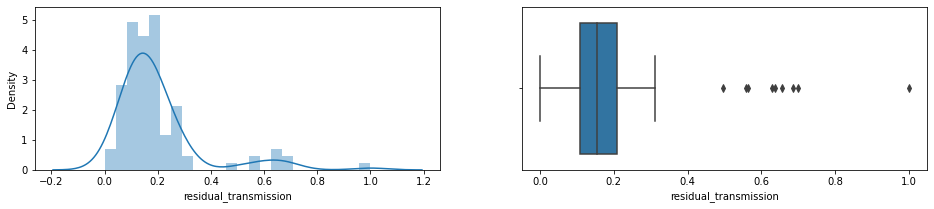

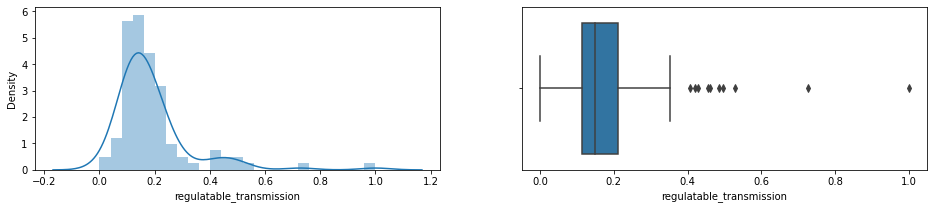

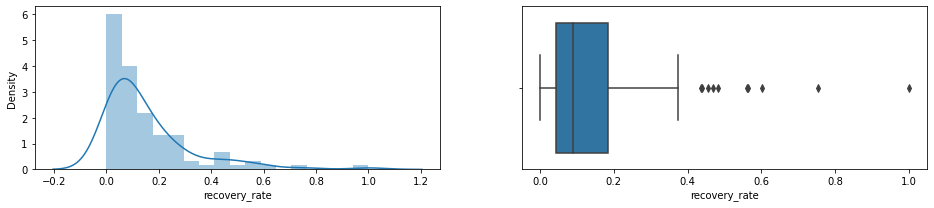

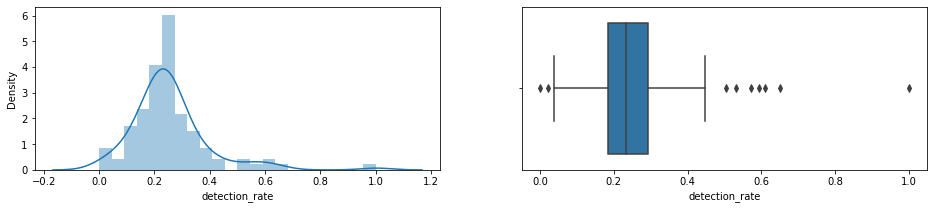

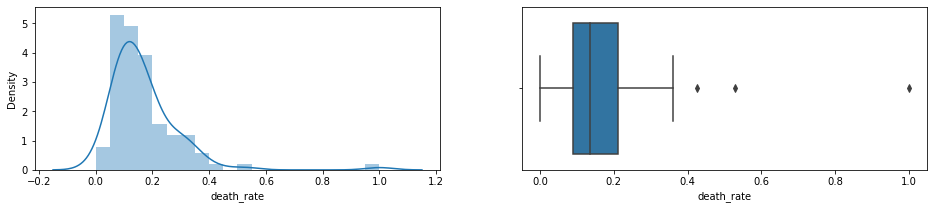

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

var=['residual_transmission','regulatable_transmission','recovery_rate','detection_rate','death_rate']

for v in var:
    plt.figure(figsize=(16,3))
    plt.subplot(1,2,1)
    sns.distplot(dfMarch[v])
    plt.subplot(1,2,2)
    sns.boxplot(dfMarch[v])
    plt.show()

For all of the above used attributes, there is a large number which rate are higher than 0.5, since outlier means that those number arnt not happened commonly, we have to handle these outliers

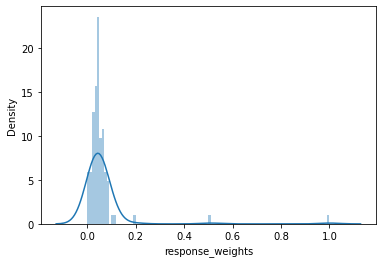

In [28]:
response_weight_dist = sns.distplot(dfMarch['response_weights'], bins=100)
plt.show()

confimming the values inside each attributes

In [29]:
dfMarch['response_weights'].sort_values().value_counts()

0.000000    1
0.049847    1
0.059359    1
0.059055    1
0.058753    1
           ..
0.033676    1
0.033261    1
0.031459    1
0.031170    1
1.000000    1
Name: response_weights, Length: 102, dtype: int64

In [30]:
from sklearn.preprocessing import StandardScaler
# take the 5 variables we want and drop the rest
df_March = dfMarch[['residual_transmission','regulatable_transmission','recovery_rate','detection_rate','death_rate']]
df_April = dfApril[['residual_transmission','regulatable_transmission','recovery_rate','detection_rate','death_rate']]
# convert them to matrix 
x_M = df_March.to_numpy()
x_A = df_April.to_numpy()
print(x_M)

[[0.08207399 0.16589837 0.12995157 0.18248722 0.17180704]
 [0.56248363 0.45503737 0.11755252 0.13143629 1.        ]
 [0.15593951 0.11408169 0.12065229 0.32685038 0.04532925]
 [0.2237704  0.05764624 0.18860861 0.26026619 0.17566896]
 [0.1252257  0.17561868 0.06461812 0.22641983 0.35911002]
 [0.10489843 0.10962957 0.14545038 0.15074961 0.15684211]
 [0.20681815 0.11427333 0.00953773 0.23861647 0.08153473]
 [0.278832   0.16394072 0.56222534 0.30508766 0.2249084 ]
 [0.05975336 0.06003548 0.48150515 0.1257116  0.32000811]
 [0.09505909 0.17597533 0.15856476 0.19838476 0.08105199]
 [0.1727443  0.09161307 0.09561574 0.11467188 0.16746238]
 [0.14986571 0.07131176 0.16834094 0.21241247 0.30311222]
 [0.15518801 0.24316335 0.14735793 0.59372215 0.05981144]
 [0.07243741 0.09815061 0.178594   0.20169882 0.06512158]
 [0.13854988 0.19307012 0.35016345 0.38587607 0.19739224]
 [0.55971611 0.42052882 0.18765484 0.05959123 0.30793962]
 [0.1832737  0.48577679 0.1836013  0.65024675 0.        ]
 [0.04282223 0

# March data

In [84]:
from sklearn.cluster import KMeans
# random state
rs = 42 #try change it later

# set the random state. different random state seeds might result in different centroids locations
model = KMeans(n_clusters=3, random_state=rs)
model.fit(x_M)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 5.734717540085727
[0.65810717 0.46840429 0.26328665 0.06049411 0.38671254]
[0.14992632 0.1464584  0.0882657  0.24617817 0.13759668]
[0.16678002 0.23523785 0.38486256 0.39784781 0.19443021]


Clustering 
is sensitive to inputs on different scale. But since our data are all measured in "rate", we dont need to apply scalling before performing clustering.

In [85]:
# scaling
#scaler = StandardScaler()
#x_M = scaler.fit_transform(x_M)

For each iteration of K-means, all data points are assigned to the closest centroids. 
Each centroids are then updated to get closer to the mean of each cluster.
Importing the K-Means clustering. 
Initialise the clustering function with n_clusters hyperparameter ( 𝐾 ) of 3 and fit it to the dataset given.

In clustering, we want to minimize the intra-cluster distance while maximizing the inter-cluster distances. After the model is fitted, print out its inertia (sum of distances of samples to their closest cluster center/centroid) and centroid locations.

In [86]:
# random state
#rs = 42 #try change it later

# set the random state. different random state seeds might result in different centroids locations
#model = KMeans(n_clusters=3, random_state=rs)
#model.fit(x_M)

# sum of intra-cluster distances
#print("Sum of intra-cluster distance:", model.inertia_)

#print("Centroid locations:")
#for centroid in model.cluster_centers_:
#    print(centroid)

A good practice in order to find a good minimum is to rerun the algortihm several times with several initializations and keep the best result.

As stated by the others, random_state makes the results reproducible and can be useful for debugging

In [87]:
# set a different n_ clusters
model = KMeans(n_clusters = 6, random_state =rs)
model.fit(x_M)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:" , model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 3.4553490370751168
Centroid locations:
[0.14958288 0.14775741 0.0938299  0.23390855 0.14307751]
[0.69875521 0.42961486 1.         0.03755248 0.35621358]
[0.65302616 0.47325297 0.17119749 0.06336182 0.39052491]
[0.15681109 0.14753226 0.46344004 0.32080717 0.22585589]
[0.19457335 0.22471124 0.1103311  0.51926313 0.09534108]
[0.07359134 1.         0.43728585 1.         0.02312323]


The inter-class cluster show the distance between data point with cluster center, meanwhile intra-class cluster show the distance between the data point of one cluster with the other data point in other cluster. 

# April Data

In [88]:
from sklearn.cluster import KMeans
# random state
rs = 42 #try change it later

# set the random state. different random state seeds might result in different centroids locations
model = KMeans(n_clusters=3, random_state=rs)
model.fit(x_A)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)


Sum of intra-cluster distance: 9.966122771726681
Centroid locations:
[0.35951036 0.20635465 0.57535795 0.31398415 0.39101974]
[0.22498561 0.18680477 0.12857377 0.303165   0.2114157 ]
[0.33326521 0.31696083 0.32342154 0.69950904 0.06687777]


In [89]:
# scaling
#scaler = StandardScaler()
#x_A = scaler.fit_transform(x_A)

In [90]:
#after scaling
#from sklearn.cluster import KMeans
# random state
#rs = 42 #try change it later

# set the random state. different random state seeds might result in different centroids locations
#model = KMeans(n_clusters=4, random_state=rs)
#model.fit(x_A)

# sum of intra-cluster distances
#print("Sum of intra-cluster distance:", model.inertia_)

#print("Centroid locations:")
#for centroid in model.cluster_centers_:
#    print(centroid)

In [91]:
# set a different n_ clusters
model = KMeans(n_clusters = 6, random_state =rs)
model.fit(x_A)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:" , model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 6.143715596923578
Centroid locations:
[0.32229756 0.17954265 0.19976906 0.33307272 0.45917789]
[0.2003635  0.17055211 0.54719306 0.37384444 0.21856514]
[0.34941679 0.37251794 0.3933296  0.735167   0.06130818]
[0.18209153 0.17619417 0.11586824 0.23807466 0.20774995]
[0.26516106 0.2104121  0.09460122 0.42812763 0.10898599]
[0.78528556 0.29825579 0.71463041 0.10305905 0.65062241]


# Understand and visualise a clustering Model

# March

Cluster membership
1    69
0    22
2     9
3     2
Name: Cluster_ID, dtype: int64


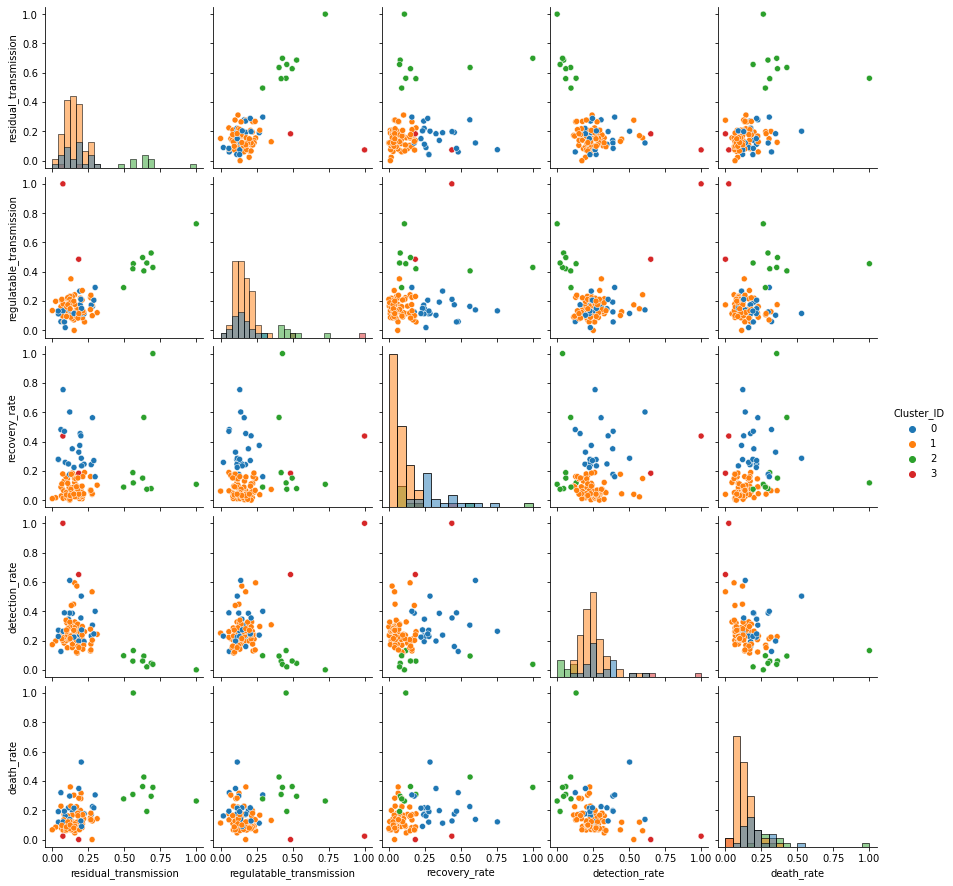

In [92]:
model = KMeans(n_clusters=4, random_state=rs).fit(x_M)

# assign cluster ID to each record in X_M
y = model.predict(x_M)
df_March['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df_March['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df_March,hue='Cluster_ID',diag_kind="hist",palette="tab10")
plt.show()

Distribution for cluster 0


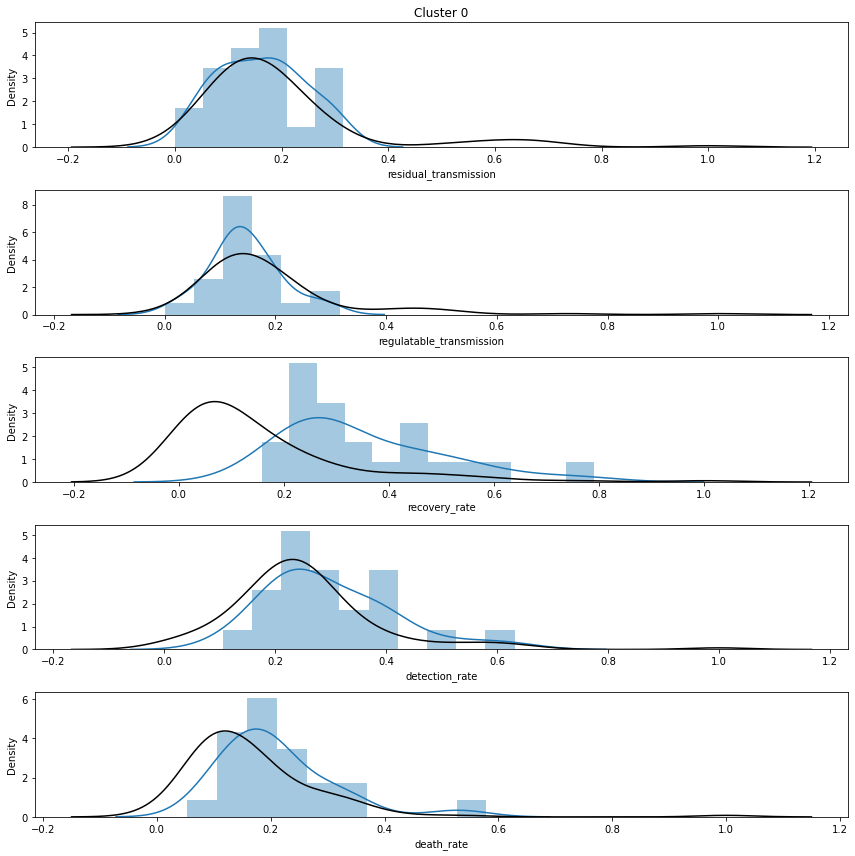

In [93]:
# prepare the column and bin size. 
# Increase bin size to be more specific, but 20 is more than enough
cols = ['residual_transmission','regulatable_transmission','recovery_rate','detection_rate','death_rate']
n_bins = 20
# inspecting cluster 2 and 3
clusters_to_inspect = [0]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=5,figsize=(12,12))
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df_March[col]), max(df_March[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df_March[df_March['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df_March[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

When looking at the recovery_rate and the death_rate plots of March Data (third row, first column, we see that cluster_ID 0 has low recovery_rate and death_rate, while cluster_ID 1 has relitivly higher recovery_rate with higher death_rate). 
Cluster_ID 2, on the other hand, has really low recovery_rate, but with higher death_rate. Finally, Cluster_ID 3 was having higher revocery_rate compare to its death_rate.

April

Cluster membership
1    82
0    18
3    14
2     4
Name: Cluster_ID, dtype: int64


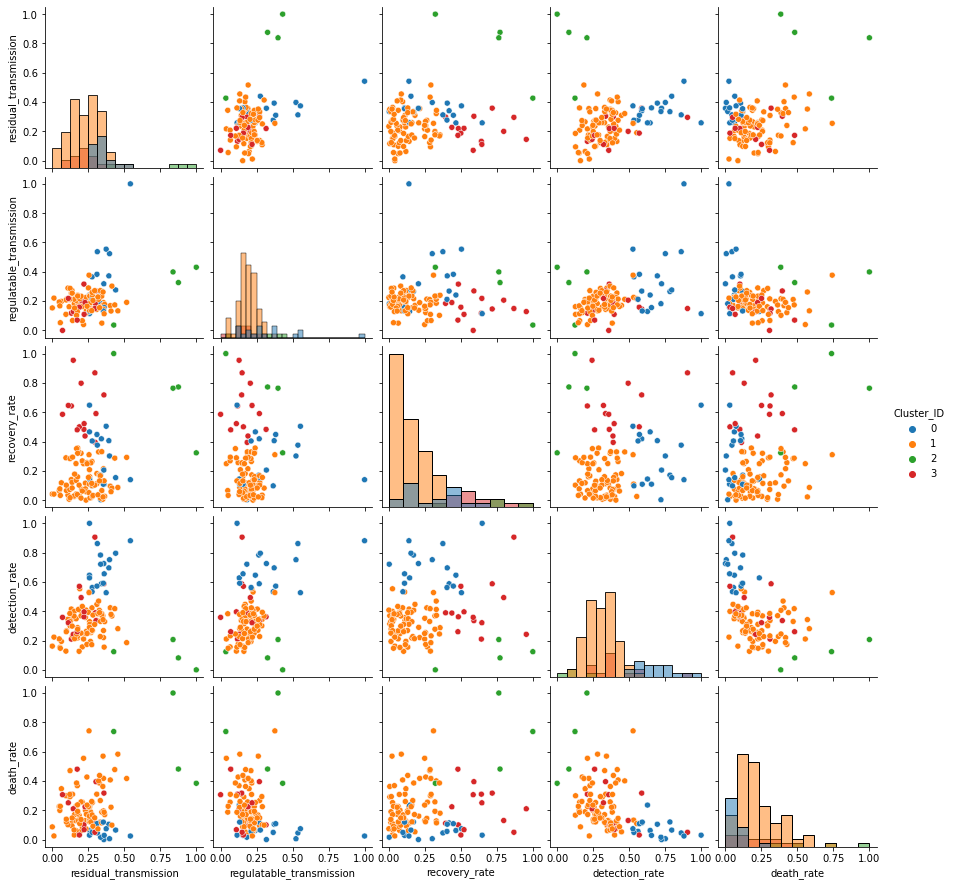

In [94]:
model = KMeans(n_clusters=4, random_state=rs).fit(x_A)

# assign cluster ID to each record in X_M
y = model.predict(x_A)
df_April['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df_April['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df_April,hue='Cluster_ID',diag_kind="hist",palette="tab10")
plt.show()

Distribution for cluster 3


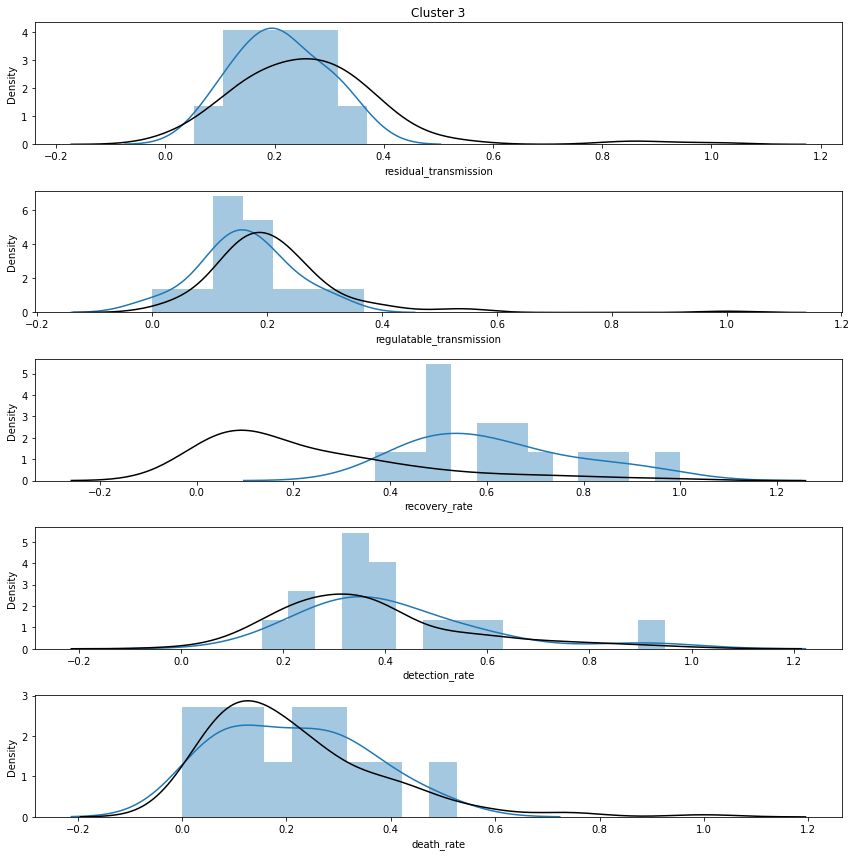

In [100]:
# prepare the column and bin size. 
# Increase bin size to be more specific, but 20 is more than enough
cols = ['residual_transmission','regulatable_transmission','recovery_rate','detection_rate','death_rate']
n_bins = 20
# inspecting cluster 2 and 3
clusters_to_inspect = [3]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=5,figsize=(12,12))
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df_April[col]), max(df_April[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df_April[df_April['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df_April[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

In [96]:

#try with more cluster
model = KMeans(n_clusters= 6, random_state=rs).fit(x_M)

# how many records are in each cluster
print("Cluster membership")
y = model.predict(x_M)
df_March['Cluster_ID'] = y
print(df_March['Cluster_ID'].value_counts())
# sum of intra-cluster distances
print("Sum of intra-cluster distance:" , model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Cluster membership
0    74
3    11
2     8
4     7
1     1
5     1
Name: Cluster_ID, dtype: int64
Sum of intra-cluster distance: 3.4553490370751168
Centroid locations:
[0.14958288 0.14775741 0.0938299  0.23390855 0.14307751]
[0.69875521 0.42961486 1.         0.03755248 0.35621358]
[0.65302616 0.47325297 0.17119749 0.06336182 0.39052491]
[0.15681109 0.14753226 0.46344004 0.32080717 0.22585589]
[0.19457335 0.22471124 0.1103311  0.51926313 0.09534108]
[0.07359134 1.         0.43728585 1.         0.02312323]


Cluster membership
0    74
3    11
2     8
4     7
1     1
5     1
Name: Cluster_ID, dtype: int64


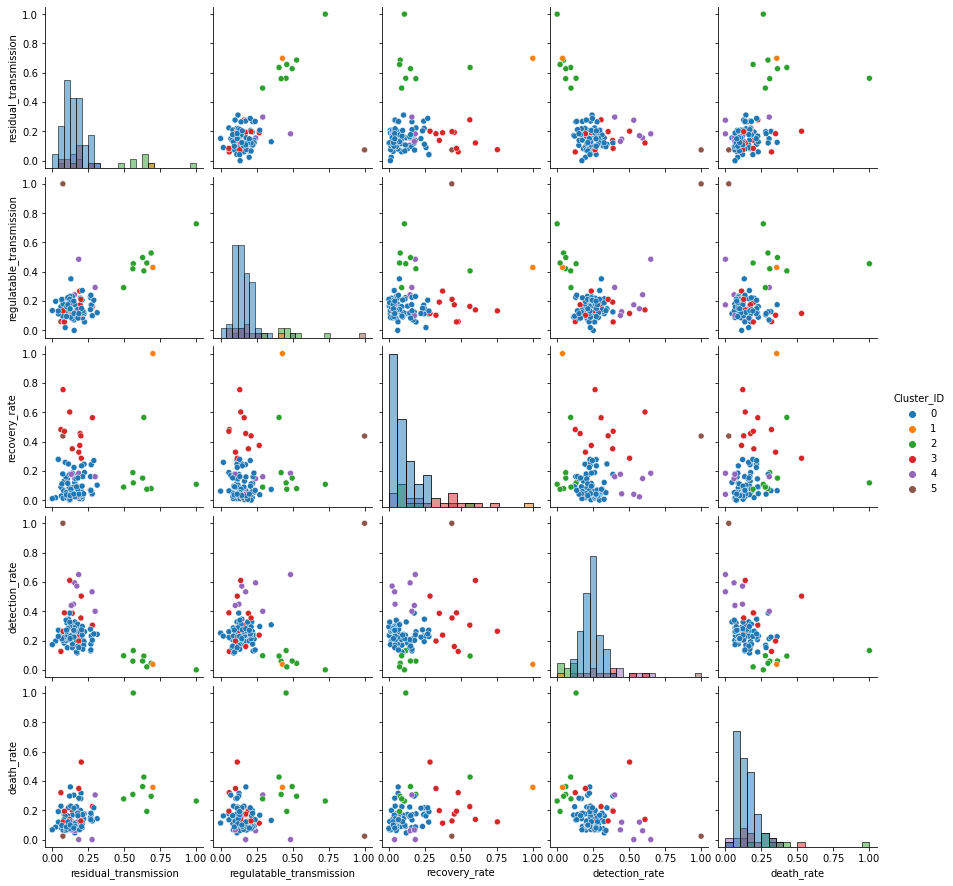

In [97]:
print("Cluster membership")
print(df_March['Cluster_ID'].value_counts())

# pairplot
cluster_g = sns.pairplot(df_March, hue='Cluster_ID',diag_kind='hist',palette="tab10")
plt.show()

As the number of clusters increases, the pairplot plots become more specific, confusing and difficult to interpret.

An alternative way to profile clusters is to plot their respective variable distributions against the distributions from all data. This method shows certain characteristics of a cluster compared to characteristics of the whole dataset. We will use distplot to visualise variable distribution. Use the following code:

# April

Cluster membership
1    82
0    18
3    14
2     4
Name: Cluster_ID, dtype: int64


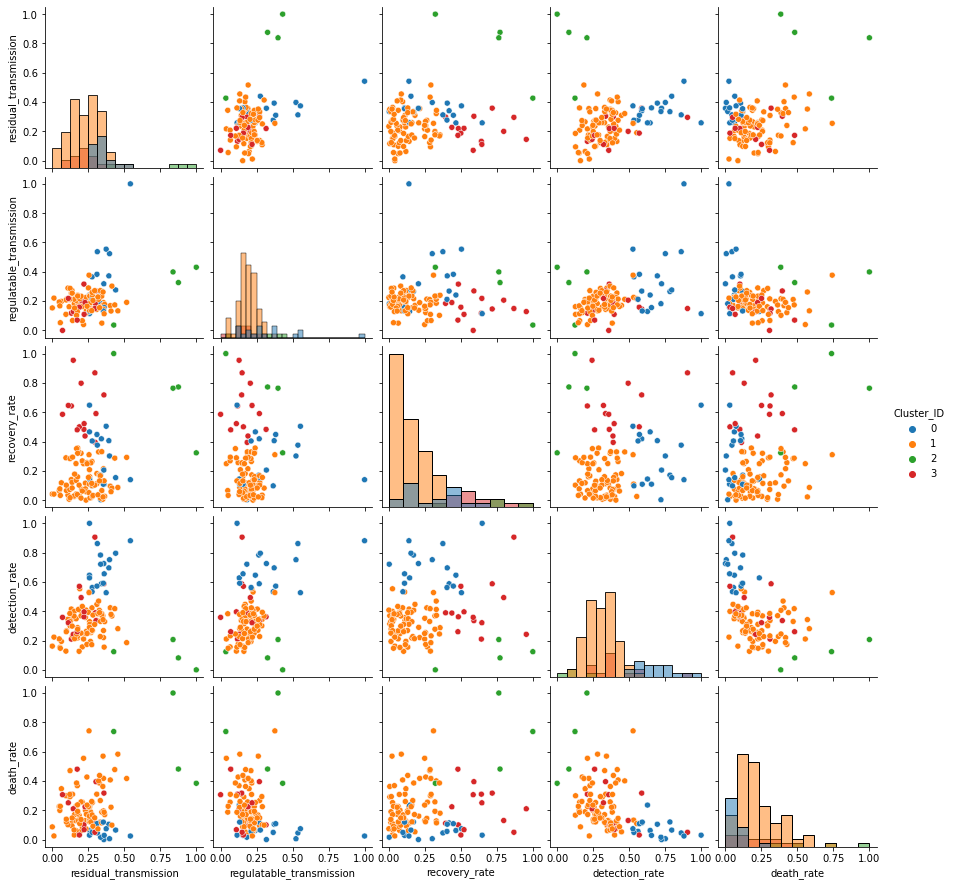

In [43]:
model = KMeans(n_clusters=4, random_state=rs).fit(x_A)

# assign cluster ID to each record in X_M
y = model.predict(x_A)
df_April['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df_April['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df_April,hue='Cluster_ID',diag_kind="hist",palette="tab10")
plt.show()

When looking at the recovery_rate and the death_rate plots of April Data (third row, first column, we see that the recovery_rate of cluster_ID 0 had higher recovery_rate compare to March and the death_rate had decreased, while cluster_ID 1 has lower recovery_rate and higher death_rate. Cluster_ID 2, the recovery_rate had remained the same as March as well as its death_rate. Finally, both the recovery and death_rate of Cluster_ID 3 had increased.

In [44]:
#try with more cluster
model = KMeans(n_clusters= 6, random_state=rs).fit(x_A)

# how many records are in each cluster
print("Cluster membership")
y = model.predict(x_A)
df_April['Cluster_ID'] = y
print(df_April['Cluster_ID'].value_counts())
# sum of intra-cluster distances
print("Sum of intra-cluster distance:" , model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Cluster membership
3    38
4    30
0    16
1    16
2    14
5     4
Name: Cluster_ID, dtype: int64
Sum of intra-cluster distance: 6.143715596923578
Centroid locations:
[0.32229756 0.17954265 0.19976906 0.33307272 0.45917789]
[0.2003635  0.17055211 0.54719306 0.37384444 0.21856514]
[0.34941679 0.37251794 0.3933296  0.735167   0.06130818]
[0.18209153 0.17619417 0.11586824 0.23807466 0.20774995]
[0.26516106 0.2104121  0.09460122 0.42812763 0.10898599]
[0.78528556 0.29825579 0.71463041 0.10305905 0.65062241]


Cluster membership
3    38
4    30
0    16
1    16
2    14
5     4
Name: Cluster_ID, dtype: int64


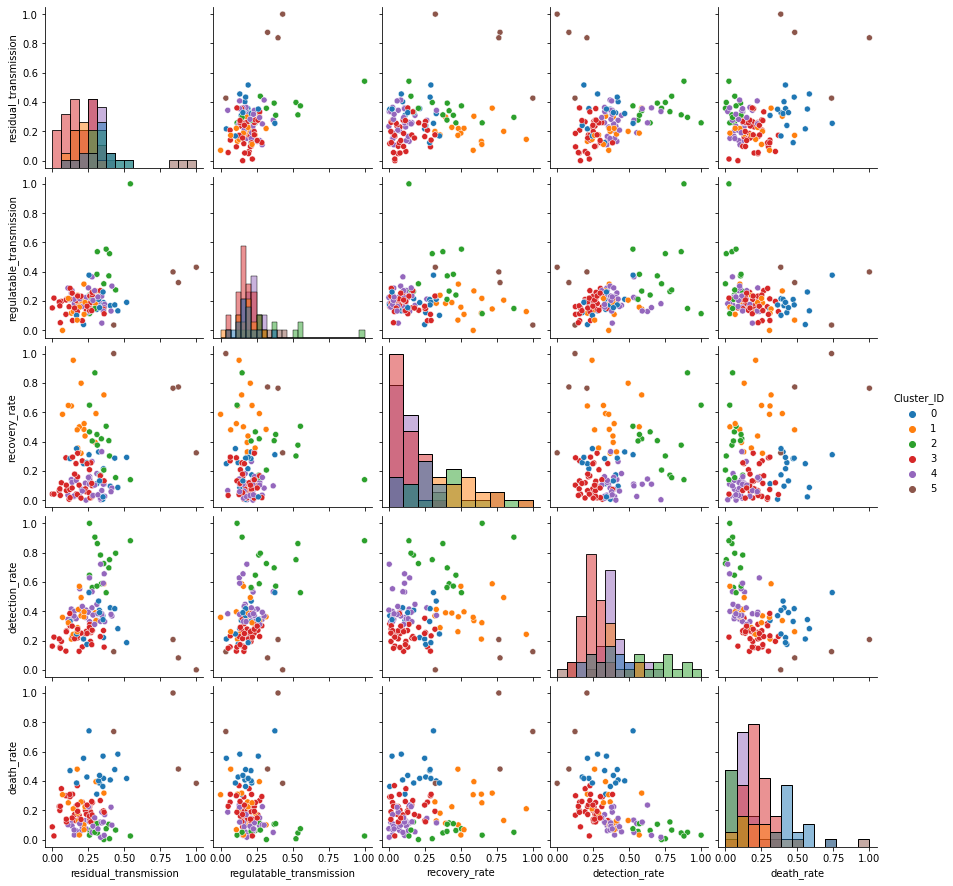

In [45]:
print("Cluster membership")
print(df_April['Cluster_ID'].value_counts())

# pairplot
cluster_g = sns.pairplot(df_April, hue='Cluster_ID',diag_kind='hist',palette="tab10")
plt.show()

# (distplot) distribution plot

# Here, we plot the distributions of cluster 0 and cluster 1 against the distributions from all data. The black lines are the distributions from all records, while light-blue lines are for a specific cluster. These plots show us the key characteristics of the clusters, as follows:

Cluster 0: Slightly higher MedHHInc, right leaning MeanHHSz and right leaning RegDens. Suburbs in cluster 0 are suburbs with above average household size and dense population. Cluster 1: Slightly lower MedHHInc, left leaning MeanHHSz and left leaning RegDens. Showing that suburbs in cluster 1 are suburbs with small average median household income, smaller families and sparse population.



#  Determin K  (March)

In [46]:
# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 1):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(x_M)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

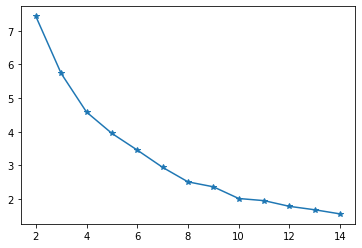

In [47]:
# plot the inertia vs K values
plt.plot(range(2,15,1), inertia_vals, marker='*')
plt.show()

the elbow is somewhere between 4 and 6. Either values can be selected as the optimal 𝐾 .

#  Determin K  (April)

In [48]:
# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(x_A)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

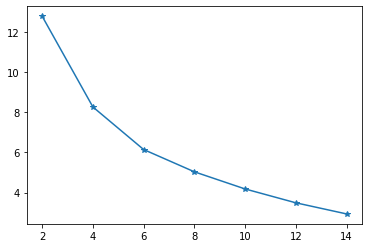

In [49]:
# plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()

the elbow is also in between 4 and 6. Either values can be selected as the optimal 𝐾 .

While being a good heuristic, the elbow method does not always yield the "obvious" K. In many cases, the error plot can be very smooth and shows no distinct K. As an alternative, silhouette score is commonly used. 

Silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. 

If most objects have a high value, then the clustering configuration is deemed high quality. If many data points have a low or negative value, then the clustering configuration may have too many or too few clusters. However, the computation of silhouette score is an expensive process and incurs addition overheads. In large datasets, it may not be feasible to compute the score for all objects/samples/records.

In the underlying clustering problem, a decision will have to be made by choosing between 𝐾=4 and 𝐾=6 . We can use the silhouette_score from sklearn, which returns the mean silhouette score for all samples for both solutions.

# silhouette  score March

In [50]:
from sklearn.metrics import silhouette_score

print("clusters [0]:", clusters[0])
print("Silhouette score for k=2", silhouette_score(x_M, clusters[0].predict(x_M)))
print()
print("clusters [1]:", clusters[1])
print("Silhouette score for k=4", silhouette_score(x_M, clusters[1].predict(x_M)))
print()
print("clusters [2]:", clusters[2])
print("Silhouette score for k=6", silhouette_score(x_M, clusters[2].predict(x_M)))
print()
print("clusters [3]:", clusters[3])
print("Silhouette score for k=10", silhouette_score(x_M, clusters[3].predict(x_M)))
print()
print("clusters [3]:", clusters[4])
print("Silhouette score for k=10", silhouette_score(x_M, clusters[4].predict(x_M)))
print()
print("clusters [3]:", clusters[5])
print("Silhouette score for k=10", silhouette_score(x_M, clusters[5].predict(x_M)))

clusters [0]: KMeans(n_clusters=2, n_jobs=10, random_state=42)
Silhouette score for k=2 0.5137207845113647

clusters [1]: KMeans(n_clusters=4, n_jobs=10, random_state=42)
Silhouette score for k=4 0.42165315825946476

clusters [2]: KMeans(n_clusters=6, n_jobs=10, random_state=42)
Silhouette score for k=6 0.27972576223033646

clusters [3]: KMeans(n_jobs=10, random_state=42)
Silhouette score for k=10 0.28238922477992523

clusters [3]: KMeans(n_clusters=10, n_jobs=10, random_state=42)
Silhouette score for k=10 0.21719288354267496

clusters [3]: KMeans(n_clusters=12, n_jobs=10, random_state=42)
Silhouette score for k=10 0.17183646593101998


In [51]:
#from sklearn.metrics import silhouette_score

#print("clusters [1]:", clusters[1])
#print("Silhouette score for k=3", silhouette_score(x_M, clusters[1].predict(x_M)))

#print("clusters [2]:", clusters[2])
#print("Silhouette score for k=4", silhouette_score(x_M, clusters[2].predict(x_M)))

#print("clusters [3]:", clusters[3])
#print("Silhouette score for k=5", silhouette_score(x_M, clusters[3].predict(x_M)))

#print("clusters [4]:", clusters[4])
#print("Silhouette score for k=6", silhouette_score(x_M, clusters[4].predict(x_M)))

silhouette_score returns a mean silhouette score of 0.42 for 𝐾=4 and 0.27 for 𝐾=6 . This shows clusters in 𝐾=4 are more appropriately matched to its own cluster then 𝐾=6 . Therefore, we could choose 𝐾=4 over 𝐾=6 on the basis of this score.

Sum of intra-cluster distance: 4.585769709878013
Centroid locations:
[0.16194036 0.1460408  0.35032137 0.29801938 0.21087801]
[0.15087112 0.15117692 0.07134637 0.25023595 0.13188727]
[0.65810717 0.46840429 0.26328665 0.06049411 0.38671254]
[0.12843252 0.7428884  0.31044358 0.82512338 0.01156161]
Cluster membership
1    69
0    22
2     9
3     2
Name: Cluster_ID, dtype: int64


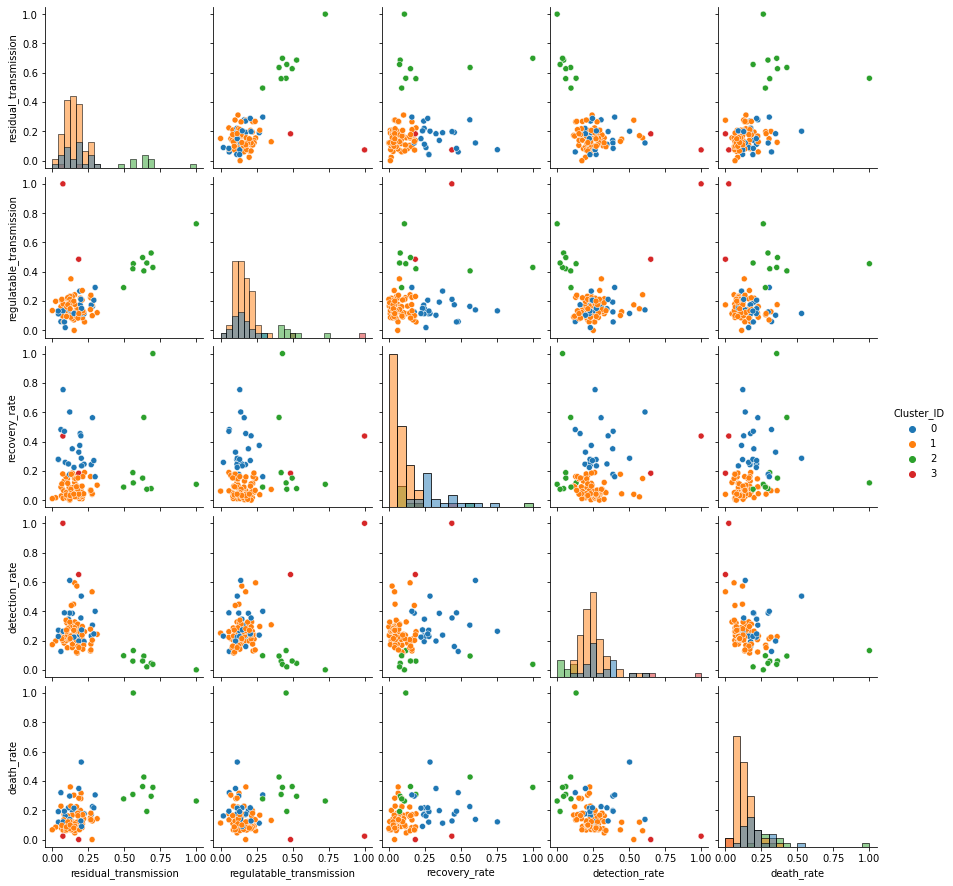

In [52]:
# visualisation of K=4 clustering solution
model = KMeans(n_clusters=4, random_state=rs)
model.fit(x_M)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

y = model.predict(x_M)
df_March['Cluster_ID'] = y

# how many in each
print("Cluster membership")
print(df_March['Cluster_ID'].value_counts())

# pairplot
# added alpha value to assist with overlapping points
cluster_g = sns.pairplot(df_March, hue='Cluster_ID', diag_kind='hist',palette="tab10")
plt.show()

#  silhouette score April

In [53]:
from sklearn.metrics import silhouette_score

print("Silhouette score for k=2", silhouette_score(x_A, clusters[0].predict(x_A)))
print() 
print("Silhouette score for k=4", silhouette_score(x_A, clusters[1].predict(x_A)))
print()
print("Silhouette score for k=6", silhouette_score(x_A, clusters[2].predict(x_A)))
print()
print("Silhouette score for k=10", silhouette_score(x_A, clusters[3].predict(x_A)))

Silhouette score for k=2 0.3685318895103543

Silhouette score for k=4 0.36329730623258666

Silhouette score for k=6 0.2213620372022695

Silhouette score for k=10 0.2619698551755249


Sum of intra-cluster distance: 8.260740448643114
Centroid locations:
[0.34341323 0.33507874 0.28331904 0.69525949 0.06981241]
[0.23174114 0.18936698 0.13390792 0.30683488 0.22716258]
[0.78528556 0.29825579 0.71463041 0.10305905 0.65062241]
[0.21032217 0.16178563 0.61563184 0.41561052 0.21302326]
Cluster membership
1    82
0    18
3    14
2     4
Name: Cluster_ID, dtype: int64


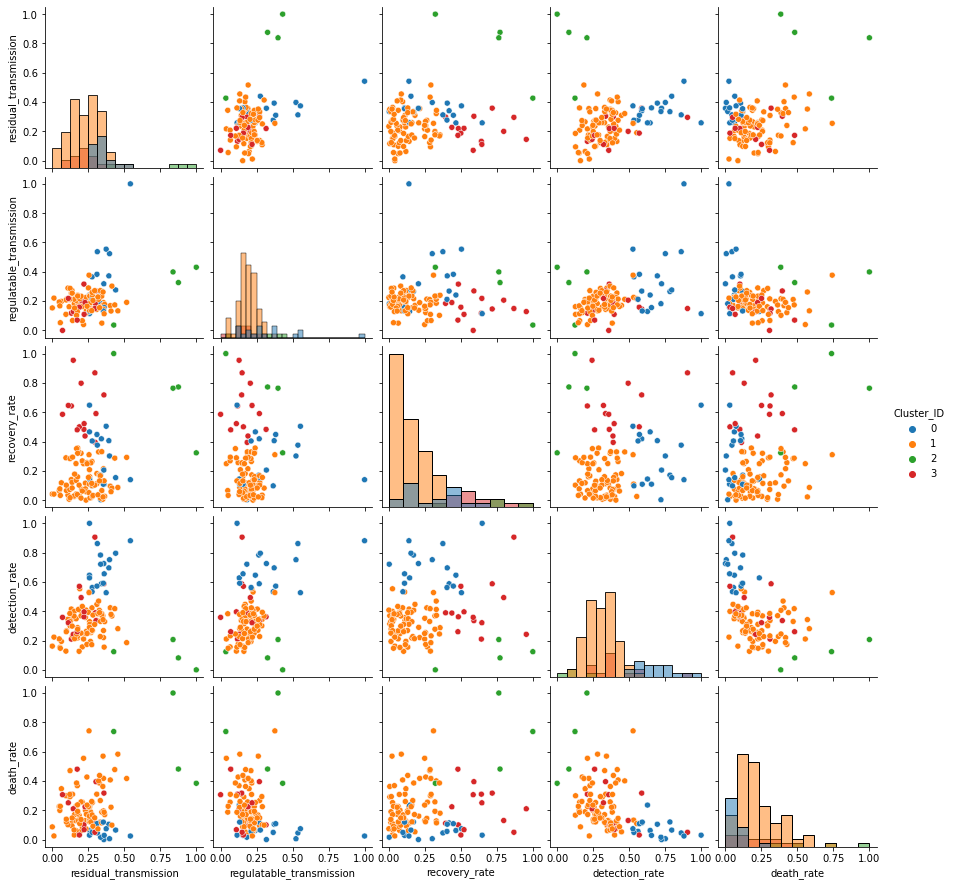

In [54]:
# visualisation of K=4 clustering solution
model = KMeans(n_clusters=4, random_state=rs)
model.fit(x_A)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

y = model.predict(x_A)
df_April['Cluster_ID'] = y

# how many in each
print("Cluster membership")
print(df_April['Cluster_ID'].value_counts())

# pairplot
# added alpha value to assist with overlapping points
cluster_g = sns.pairplot(df_April, hue='Cluster_ID', diag_kind='hist',palette="tab10")
plt.show()

Running the Agglomerative Clustering Algorithm As an alternative to K-means clustering which uses centroid-based approach, hierarchical clustering is also commonly used to perform clustering on dataset. it starts from bottom and assigns each data point as its own cluster. For each pair of clusters, agglomerative clustering recursively merges the pair of clusters, minimising linkage distance between each cluster.
Similar to KMeans, import an agglomerative clustering algorithm using the sklearn.cluster module.

In [55]:
from sklearn.cluster import AgglomerativeClustering
agg_model = AgglomerativeClustering(n_clusters=3)
agg_model.fit(x_M[:50]) # subset of X, only 50 data points

AgglomerativeClustering(n_clusters=3)

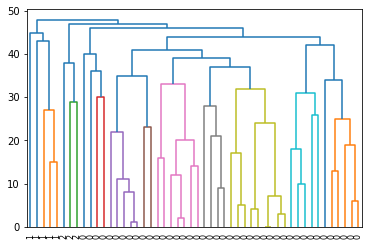

In [56]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
plot_dendrogram(agg_model, labels=agg_model.labels_)
plt.show()